# Bibliotecas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy import signal
from sklearn.preprocessing import LabelEncoder
import mne

# Carregamento

In [2]:
mne_data = mne.read_epochs('beta.fif')
mne_data

Reading c:\Users\gregu\Projetos\SSVEP\SSVEP\src\Beta\beta.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    1462.89 ms
        0 CTF compensation matrices available
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated


C:\Users\gregu\AppData\Local\Temp\ipykernel_17648\1848343817.py:1: RuntimeWarning: This filename (beta.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  mne_data = mne.read_epochs('beta.fif')


Number of events,160
Events,10: 410.2: 410.4: 410.6: 410.8: 411: 411.2: 411.4: 411.6: 411.8: 412: 412.2: 412.4: 412.6: 412.8: 413: 413.2: 413.4: 413.6: 413.8: 414: 414.2: 414.4: 414.6: 414.8: 415: 415.2: 415.4: 415.6: 415.8: 48: 48.2: 48.4: 48.6: 48.8: 49: 49.2: 49.4: 49.6: 49.8: 4
Time range,0.000 – 1.463 s
Baseline,off


In [3]:
y = np.load("../../dataset/beta/labels.npy")

y_set = sorted(set(y))

In [5]:
ch_names = list(np.load("../../dataset/beta/channels.npy"))

<EpochsFIF |  160 events (all good), 0 – 1.46289 s, baseline off, ~58.6 MB, data loaded,
 '8': 4
 '8.2': 4
 '8.4': 4
 '8.6': 4
 '8.8': 4
 '9': 4
 '9.2': 4
 '9.4': 4
 '9.6': 4
 '9.8': 4
 and 30 more events ...>


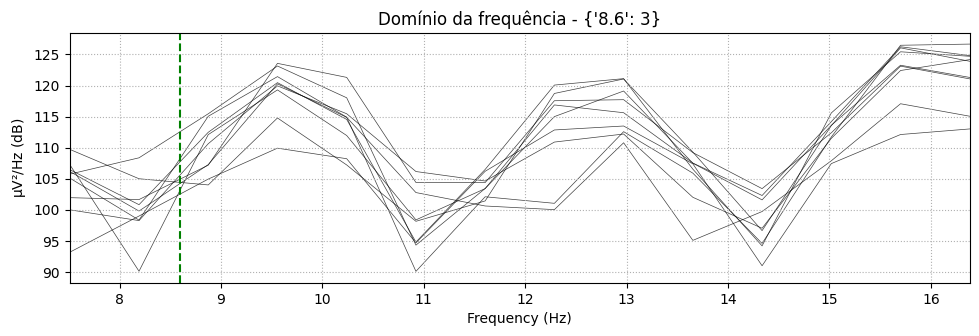

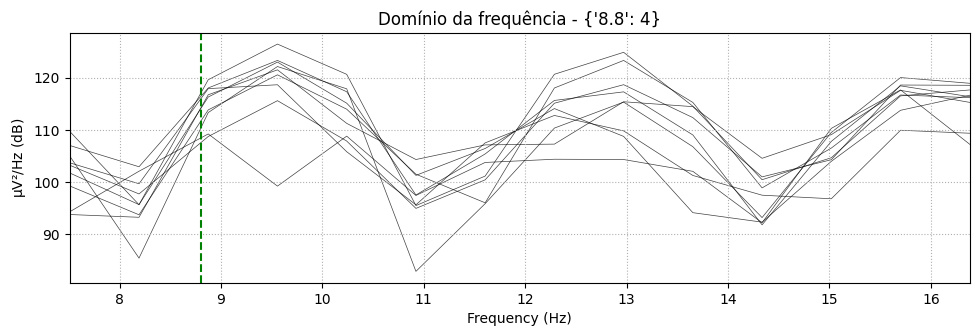

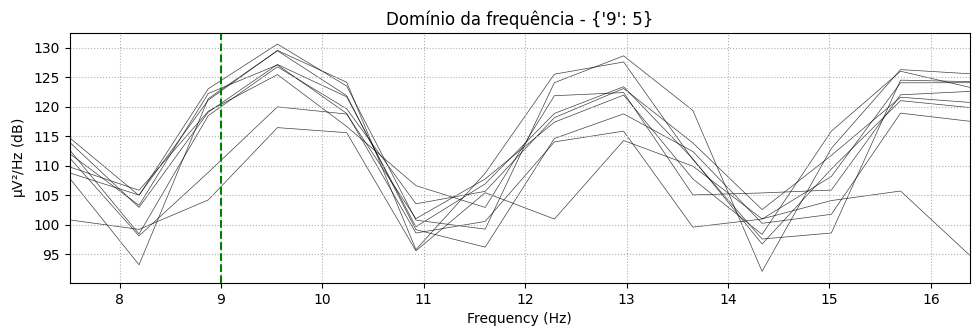

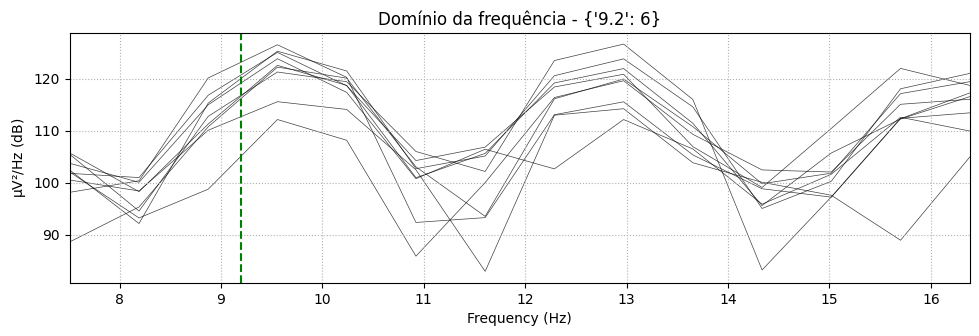

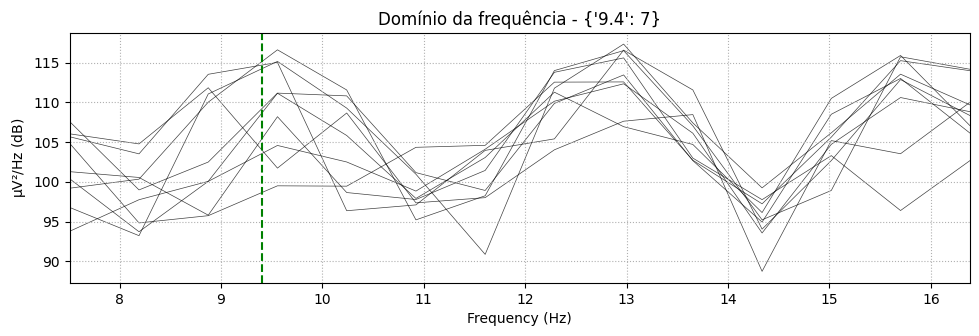

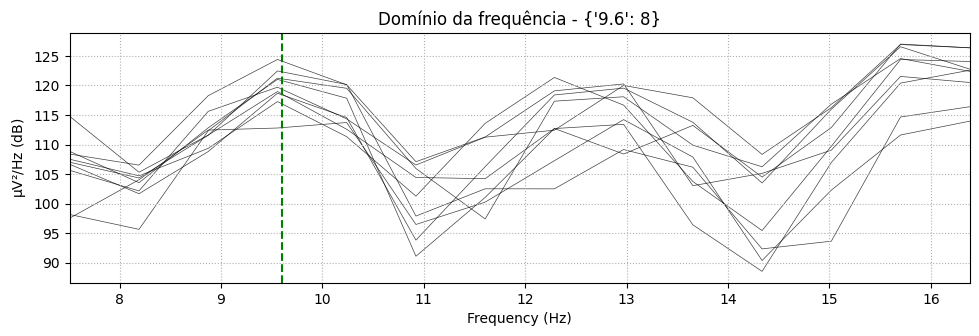

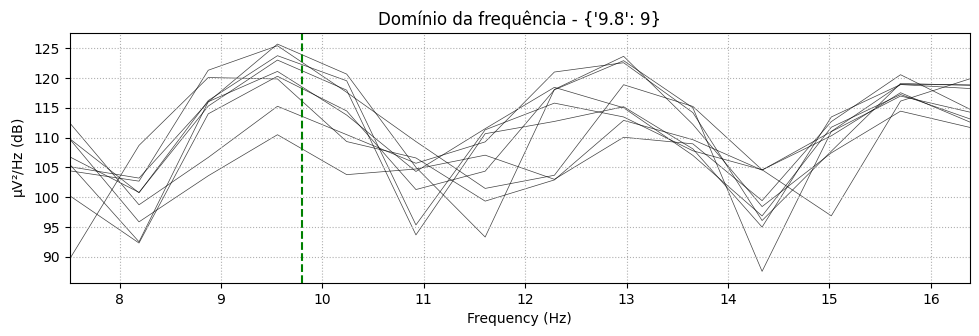

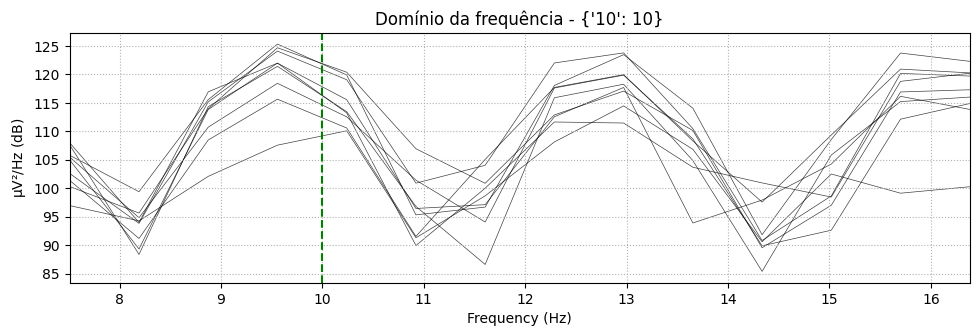

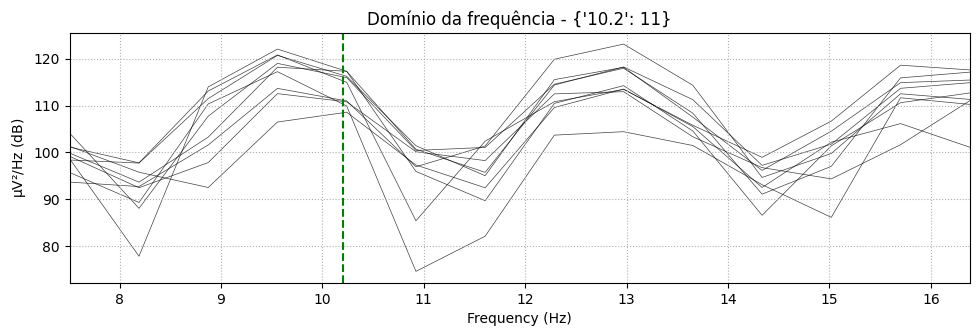

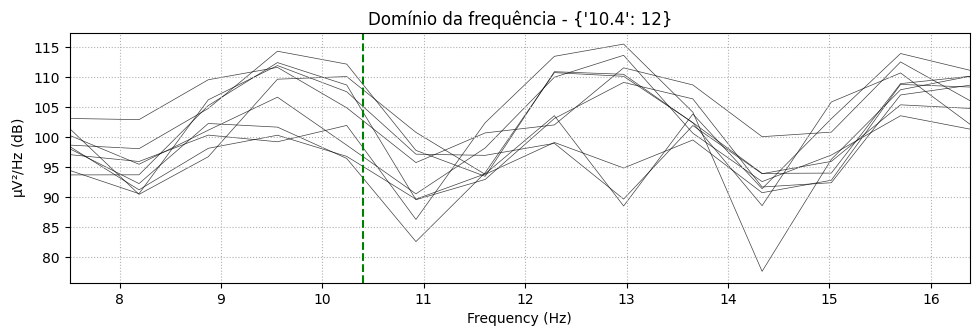

In [6]:
import warnings
warnings.filterwarnings('ignore')

channels_to_keep = ['PZ', 'PO3', 'PO5', 'PO4', 'PO6', 'POZ', 'O1', 'OZ', 'O2']
channels_to_remove = set(ch_names) - set(channels_to_keep)

print(mne_data)

mne_data = mne_data.drop_channels(list(channels_to_remove))
qtd_data = len(mne_data)

for i in range(0, 10):
    view = mne_data[i].compute_psd(method='welch', fmin=7, fmax=17, verbose=False)
        
    view.plot(show=False)
    plt.title(f'Domínio da frequência - {view.event_id}')
    plt.axvline(x=float(list(mne_data[i].event_id)[0]), linestyle='--', color='green')
    plt.show()

In [7]:
limiar = 1
hits = 0

for i in range(0, qtd_data):
    dict_y = {str(value): index  for index, value in enumerate(y_set)}

    view = mne_data[i].compute_psd(method='welch', fmin=7, fmax=17, verbose=False)

    for frequency in y_set:
        fmin = frequency - limiar
        fmax = frequency + limiar

        array_values = view.get_data(fmin=fmin, fmax=fmax)

        value_view = np.max(array_values)
        # value_view = np.average(array_values)
        # value_view = np.median(array_values)

        dict_y[str(frequency)] = value_view

    target_frequency = max(dict_y, key=dict_y.get)
    if float(target_frequency) == float(list(mne_data[i].event_id)[0]):
        hits += 1

print(f"Percentage: {hits*100/len(y)}")

Percentage: 3.125


In [8]:
limiar = 1
hits = 0

for i in range(0, qtd_data):
  view = mne_data[i].compute_psd(method='welch', fmin=7, fmax=17, verbose=False)


  array_values = view.get_data()

  max_frequency = np.max(array_values)
  print(max_frequency)
  # value_view = np.average(array_values)
  # value_view = np.median(array_values)
  nearest_frequency = y_set[np.abs(y_set - max_frequency).argmin()]
  print(nearest_frequency)

print(f"Percentage: {hits*100/len(y)}")

4.6393445525482635
8.0
4.380152968240155
8.0
11.509678311272415
11.6
4.681404029033814
8.0
0.5425008041600347
8.0
5.022595400807334
8.0
3.700502126335212
8.0
3.4089423001884827
8.0
2.0527476662449193
8.0
0.35755888723460466
8.0
2.6089388425351405
8.0
1.5928137881360187
8.0
2.43542848989691
8.0
1.5366893517748799
8.0
0.6908276475098887
8.0
1.8028790857722579
8.0
0.8671223473313219
8.0
1.768929661486487
8.0
0.9134814823098628
8.0
0.6285920620124538
8.0
0.9047583257258366
8.0
1.1252615223559164
8.0
1.3543744751273687
8.0
0.8122494425298129
8.0
0.28988248270063066
8.0
0.9958890159731898
8.0
0.8683250866619479
8.0
1.3897763014022457
8.0
0.9170094233060818
8.0
0.3322256192080929
8.0
1.411427130554947
8.0
1.0688650515380929
8.0
2.3152202727431295
8.0
1.56449971722227
8.0
0.5878716439562605
8.0
0.8884767128596773
8.0
0.7709937516855909
8.0
1.1447449803599858
8.0
0.7934940056166747
8.0
0.33579795174858373
8.0
0.758723481906487
8.0
0.46252872025485553
8.0
0.3996092421381213
8.0
0.308886786128428